# Sect 20 (v2.1): Extensions to Linear Models

- online-ds-pt-100719
- 03/03/20

## Objectives

**DISCUSSION:**
- Discuss interactions between variables
- Discuss using dictionaries for scrubbing the whole df in a few lines of code. 
- Discuss polynomial regressions.
- Discuss the Bias vs Variance trade-off.



**APPLICATION:**
- Linear Regression with Boston Housing data set

## Topics Covered in Section 20


- Interactions
- Polynomial Regression    
- Bias-Variance Trade Off

## Questions / Comments
- Shape issues with skearn
- Using `model.predict(X)`

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

pd.set_option('display.max_columns',0)
plt.style.use('seaborn-notebook')

fsds_1007219  v0.7.16 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
def load_dataset():
    df = fs.datasets.load_boston()

    # Making example column
    data = ['?',1,2,3,4,np.nan,"N/A"]
    df['example'] = np.random.choice(data,len(df),replace=True)
    return df

df = load_dataset()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,N/A
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,nan
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2


# Interactions

## What is an interaction?

When variables interact to **cause an effect** to another variable but is **not the sum of their parts**

> "An interaction is a particular property of two or more variables where they interact in a non-additive manner when affecting a third variable" - *Section recap*

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-interaction-terms-online-ds-pt-100719/master/images/new_diet_image.png">


> In our example, the interaction plot was composed out of categorical predictors (countries and diet type), but interactions can occur between categorical variables or between a mix of categorical variables and continuous variables!

### Confounding factor

>This means that the "Country" and "Diet" affect weight loss in a non-additive matter. If we're mostly interested in the effect of diet on weight loss (which seems to be plausible here), we say that "Country" is a **confounding factor** of the effect of "Diet" on weight loss.

![](images/diet_interaction.png)

### Why is important to account for interactions?

> - "Not accounting for them might lead to results that are wrong."

> - You'll also notice that including them when they're needed will increase your $R^2$ value!


- Replacing 2 individual columns with their interaction column can reduce the overall number of features.

- One way of addessing multicollinearity is to replace 2 multicollinear columns with the interaction term.

### When should we use interactions?

- Whenever it can help the model, but not required.
- Can use in hypothesis testing as well (for ANOVAs)

## Using seaborn to view interactions

https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

- ~~`sns.factorplot`~~
- `sns.catplot`
- `sns.FacetGrid`

### Ex Interaction: Not very different

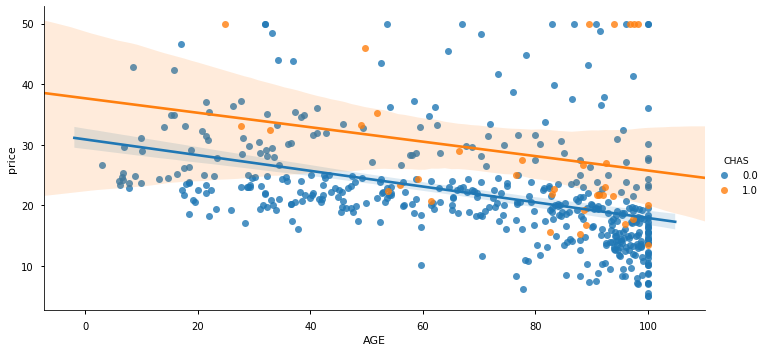

In [3]:
g = sns.FacetGrid(df,hue='CHAS',aspect=2,height=5)
g.map(sns.regplot,'AGE','price')
g.add_legend()

### Ex Interaction: different

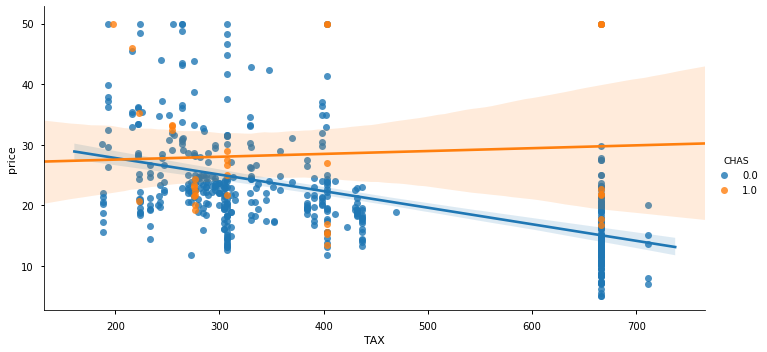

In [4]:
g = sns.FacetGrid(df,hue='CHAS',aspect=2,height=5)
g.map(sns.regplot,'TAX','price')
g.add_legend()

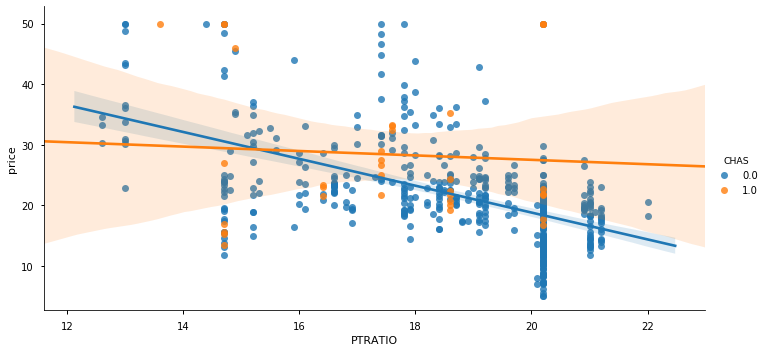

In [5]:
g = sns.FacetGrid(df,hue='CHAS',aspect=2,height=5)
g.map(sns.regplot,'PTRATIO','price')
g.add_legend()

# High-Level Programmatic Scrubbing with `pandas_profiling` and dictionaries

#### OSEMN
1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check dtypes, preview
    - Drop unneeded columns

2. **[SCRUB](#SCRUB)**
    - Recast data types
    - Find and deal with weird/placeholder values
    - Check for and Address null values
    - Identify (& remove) outliers
    - Check for multicollinearity
    - Normalize/standardize data (depending on type of model)
    

         
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
    - [ ] Use scatter plots to check for linearity and possible categorical variables 
    - [ ] Check for linear relationships (if required by model).
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
- **Interpret final model and draw >=3 conclusions and recommendations from dataset**

### Quick EDA/Srubbing with `pandas_profiling` and dictionaries.

- When we know what we must address, we can use advanced tool and loops/dictionaries to do all scrubbing in a few lines of code3

- [Speed Up Your Exploratory Data Analysis With Pandas-Profiling](https://towardsdatascience.com/speed-up-your-exploratory-data-analysis-with-pandas-profiling-88b33dc53625)

```python
from pandas_profiling import ProfileReport
ProfileReport(df)```

In [6]:
# df = load_dataset()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,N/A
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,nan
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2


In [7]:
from pandas_profiling import ProfileReport
ProfileReport(df)

2. **[SCRUB](#SCRUB)**
    - Recast data types
    - Find and deal with weird/placeholder values
    - Check for and Address null values
    - Identify (& remove) outliers
    - Check for multicollinearity
    - Normalize/standardize data (depending on type of model)
    

In [8]:
## Drop unneeded cols
drop_cols = ['INDUS']
[df.drop(col,axis=1,inplace=True) for col in drop_cols if col in df.columns]
df.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,N/A
2,0.02729,0.0,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,nan
4,0.06905,0.0,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2


In [9]:
## Find and deal with weird/placeholder values
display(df['example'].value_counts(dropna=False))
df['example'].isna().sum()

nan    79
1      76
3      75
N/A    75
2      69
4      67
?      65
Name: example, dtype: int64

0

In [10]:
help(df['example'].replace)

Help on method replace in module pandas.core.series:

replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad') method of pandas.core.series.Series instance
    Replace values given in `to_replace` with `value`.
    
    Values of the Series are replaced with other values dynamically.
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.
    
        * numeric, str or regex:
    
            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_replace` will be replaced with
              `value`
    
        * list of str, regex, or numeric:
    


In [11]:
## Replacing Values
repl_dict = {'example': {'?':0,
                        'N/A':np.nan,
                        'nan':np.nan}}

for col, replace_vals in repl_dict.items():
    df[col] = df[col].replace(replace_vals)


In [12]:
## Find and deal with weird/placeholder values
display(df['example'].value_counts(dropna=False))
df['example'].isna().sum()

NaN    154
1.0     76
3.0     75
2.0     69
4.0     67
0.0     65
Name: example, dtype: int64

154

In [13]:
## Fill Null values / zeros
fillna_dict = {'example':0}
for col, val in fillna_dict.items():
    df[col] = df[col].fillna(val)

In [14]:
df['example'].isna().sum()

0

In [15]:
## Recasting datatypes
df.dtypes

CRIM       float64
ZN         float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example    float64
dtype: object

In [16]:
recast_dict = {'CHAS':int, 'example':int}
for col, dtype in recast_dict.items():
    df[col] = df[col].astype(dtype)

In [17]:
df.dtypes

CRIM       float64
ZN         float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example      int64
dtype: object

In [18]:
## we can wrap everything we did above in 1 function
def scrub_df(data,drop_cols =[],#['id','date','view'],
                       repl_dict = {},#{'sqft_basement':('?','0.0')},
                       recast_dict = {},#{'sqft_basement':'float'},
                       fillna_dict = {},#{'waterfront':0,'yr_renovated':0},
                      verbose=1):
    """
    Performs scrubbing process on the df in the following order:
    1. Drop cols in the drop_cols list
    2. Replace values using repl_dict
    3. Recast dtypes using recast_dict
    4. Fillna using fillna_dict
    
    Args:
        data (Frame):
        drop_cols (list):
        repl_dict (dict): Key=column name, 
                            value= dict of {to_replace:replace_with}
        recast_dict(dict): 
        fillna_dict(dict): key = column name,
                            val = value to fill with or function to apply 
    """
    import copy
    df = copy.deepcopy(data)#.copy()
    
    ## Drop cols
    drop_cols = []
    [df.drop(col,axis=1,inplace=True) for col in drop_cols if col in df.columns]


    ## Replacing Values
    for col,replace_vals in repl_dict.items():
            df[col] = df[col].replace(replace_vals)


    
    ## Fill Null values / zeros
    for col,val in fillna_dict.items():
        import types
        if isinstance(val, types.FunctionType):
            fill_val = val(df[col])
        else:
            fill_val = val
        
        df[col].fillna(fill_val,inplace=True)
 
    ## Recasting datatypes
    for col,dtype in recast_dict.items():
        df[col] = df[col].astype(dtype)
    df.dtypes
    
    ## display preview
    if verbose>0:
        display(df.head())
    if verbose>1:
        display(df.info())

    return df
    

In [19]:
df = load_dataset()
## use function
df = scrub_df(df, drop_cols=drop_cols,repl_dict=repl_dict, 
              recast_dict=recast_dict,fillna_dict=fillna_dict)
df.info()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
example    506 non-null int64
dtypes: float64(13), int64(2)
memory usage: 59.4 KB


In [20]:
df['example'].value_counts()

0    216
4     93
3     70
1     65
2     62
Name: example, dtype: int64

In [21]:
df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533,1.524
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197,1.577
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000,0.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025,0.000
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200,1.000
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000,3.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000,4.000


In [22]:
df.select_dtypes('int').columns

Index(['CHAS', 'example'], dtype='object')

In [23]:
help(df.select_dtypes)

Help on method select_dtypes in module pandas.core.frame:

select_dtypes(include=None, exclude=None) method of pandas.core.frame.DataFrame instance
    Return a subset of the DataFrame's columns based on the column dtypes.
    
    Parameters
    ----------
    include, exclude : scalar or list-like
        A selection of dtypes or strings to be included/excluded. At least
        one of these parameters must be supplied.
    
    Returns
    -------
    DataFrame
        The subset of the frame including the dtypes in ``include`` and
        excluding the dtypes in ``exclude``.
    
    Raises
    ------
    ValueError
        * If both of ``include`` and ``exclude`` are empty
        * If ``include`` and ``exclude`` have overlapping elements
        * If any kind of string dtype is passed in.
    
    Notes
    -----
    * To select all *numeric* types, use ``np.number`` or ``'number'``
    * To select strings you must use the ``object`` dtype, but note that
      this will return *a

In [24]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [25]:
## Get lists of categorical vs numeric columns
target = 'price'

## Scale non-categorical columns
cat_cols = list(df.select_dtypes('int').columns)
num_cols = list(df.drop(columns=[target]).select_dtypes(include = ['number'],
                                                   exclude= ['int']).columns)
cat_cols, num_cols



(['CHAS', 'example'],
 ['CRIM',
  'ZN',
  'INDUS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'])

In [26]:
## Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [27]:
df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-0.000,0.000,0.000,0.069,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,22.533,1.524
std,1.001,1.001,1.001,0.254,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,9.197,1.577
min,-0.420,-0.488,-1.558,0.000,-1.466,-3.880,-2.335,-1.267,-0.983,-1.314,-2.707,-3.907,-1.531,5.000,0.000
25%,-0.411,-0.488,-0.868,0.000,-0.913,-0.569,-0.837,-0.806,-0.638,-0.768,-0.488,0.205,-0.799,17.025,0.000
50%,-0.391,-0.488,-0.211,0.000,-0.144,-0.108,0.317,-0.279,-0.523,-0.465,0.275,0.381,-0.181,21.200,1.000
75%,0.007,0.049,1.016,0.000,0.599,0.483,0.907,0.662,1.661,1.531,0.807,0.434,0.603,25.000,3.000
max,9.934,3.804,2.423,1.000,2.732,3.555,1.117,3.961,1.661,1.798,1.639,0.441,3.549,50.000,4.000


In [28]:
# deal with outliers in numeric non-target columns
idx_out = fs.find_outliers_Z(df['CRIM'])
df.loc[idx_out]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
380,9.933931,-0.487722,1.015999,0,1.004680,0.973563,0.829454,-1.130686,1.661245,1.530926,0.806576,0.441052,0.638763,10.4,0
398,4.042606,-0.487722,1.015999,0,1.194724,-1.184795,1.117494,-1.095936,1.661245,1.530926,0.806576,0.441052,2.514288,5.0,0
404,4.412370,-0.487722,1.015999,0,1.194724,-1.073672,0.598310,-1.039938,1.661245,1.530926,0.806576,-0.298384,2.064330,8.5,2
405,7.483646,-0.487722,1.015999,0,1.194724,-0.857124,1.117494,-1.126455,1.661245,1.530926,0.806576,0.310247,1.447566,5.0,3
410,5.530321,-0.487722,1.015999,0,0.365444,-0.751699,1.117494,-1.132350,1.661245,1.530926,0.806576,-3.882195,-0.356471,15.0,1
414,4.903104,-0.487722,1.015999,0,1.194724,-2.515426,1.117494,-1.015789,1.661245,1.530926,0.806576,-2.942878,3.409999,7.0,4
418,8.136884,-0.487722,1.015999,0,1.073787,-0.466767,1.117494,-0.947146,1.661245,1.530926,0.806576,-3.730338,1.116756,8.8,4
427,3.962320,-0.487722,1.015999,0,1.073787,-0.117726,0.360054,-0.918481,1.661245,1.530926,0.806576,-3.704353,0.261696,10.9,4


In [29]:
df_outs = pd.DataFrame()
## Find outliers
for col in num_cols:
    idx_outs = fs.find_outliers_Z(df[col])
    df_outs[col]= idx_outs
df_outs

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
## Remove outliers
out_rows = df_outs.any(axis=1)
out_rows

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [31]:
df = df.loc[~out_rows]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,2
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,1
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,1
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4,0
502,-0.415249,-0.487722,0.115738,0,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6,2
503,-0.413447,-0.487722,0.115738,0,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9,4
504,-0.407764,-0.487722,0.115738,0,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0,0


In [32]:
df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
count,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000
mean,-0.140,-0.089,-0.023,0.074,-0.034,-0.010,-0.012,-0.003,-0.096,-0.090,-0.026,0.191,-0.059,22.769,1.522
std,0.554,0.827,0.984,0.262,0.982,0.889,0.986,0.918,0.939,0.956,0.989,0.568,0.909,8.489,1.580
min,-0.420,-0.488,-1.558,0.000,-1.466,-2.731,-2.335,-1.267,-0.983,-1.308,-2.707,-2.996,-1.531,5.600,0.000
25%,-0.411,-0.488,-0.868,0.000,-0.878,-0.565,-0.814,-0.767,-0.638,-0.779,-0.534,0.230,-0.766,17.800,0.000
50%,-0.394,-0.488,-0.376,0.000,-0.231,-0.129,0.246,-0.204,-0.523,-0.578,0.113,0.390,-0.199,21.450,1.000
75%,-0.167,0.049,1.016,0.000,0.512,0.436,0.897,0.628,-0.178,0.171,0.807,0.441,0.498,25.000,3.000
max,2.914,2.946,2.423,1.000,2.732,2.978,1.117,2.580,1.661,1.798,1.269,0.441,2.711,50.000,4.000


In [33]:
target='price'
col_list = list(df.drop(target,axis=1).columns)
col_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'example']

In [34]:
## remove exclude cols
exclude_cols=[]#'example']
[col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]
col_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'example']

In [35]:
## Make rightn side of formula eqn
features = ' + '.join(col_list)
features

'CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + example'

In [36]:
features+'C(example)'

'CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + exampleC(example)'

In [37]:
cat_cols

['CHAS', 'example']

In [38]:
# ADD C() around categorical cols
for col in cat_cols:
    features = features.replace(col,f"C({col})")

features    

'CRIM + ZN + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(example)'

In [39]:
## MAKE FULL FORMULA
formula = target+'~'+features #target~predictors
print(formula)

price~CRIM + ZN + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(example)


In [40]:
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smf

## Fit model
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     70.79
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          6.27e-113
Time:                        19:57:46   Log-Likelihood:                -1294.4
No. Observations:                 448   AIC:                             2625.
Df Residuals:                     430   BIC:                             2699.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          21.6804      0.344     63.091      0.000      21.005      22.356
C(CHAS)[T.1]        3.2037      0.833      3.844      0.000       1.566       4.842
C(example)[T.1]     1.3536      0.667      2.029      0.043       0.043       2.665
C(example)[T.2]    -0.5156      0.703     -0.734      0.464      -1.897       0.866
C(example)[T.3]     0.4832      0.657      0.736      0.462      -0.807       1.774
C(example)[T.4]     0.8433      0.592      1.425      0.155      -0.320       2.006
CRIM               -1.2718      0.684     -1.859      0.064      -2.616       0.073
ZN                  0.1883      0.359      0.525      0.600      -0.517       0.894
INDUS               0.1940      0.407      0.477      0.634      -0.606       0.994
NOX                -1.6906      0.449     -3.765      0.000      -2.573      -0.808
RM                  3.4518      0.340     10.149      0.000       2.783       4.120
AGE                -0.3959      0.366     -1.082      0.280      -1.116       0.324
DIS                -2.7265      0.436     -6.247      0.000      -3.584      -1.869
RAD                 2.2516      0.623      3.612      0.000       1.026       3.477
TAX                -1.6033      0.620     -2.588      0.010      -2.821      -0.385
PTRATIO            -1.8786      0.280     -6.715      0.000      -2.428      -1.329
B                   0.6152      0.411      1.498      0.135      -0.192       1.422
LSTAT              -3.6515      0.407     -8.975      0.000      -4.451      -2.852
==============================================================================
Omnibus:                      199.796   Durbin-Watson:                   1.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1314.890
Skew:                           1.804   Prob(JB):                    2.99e-286
Kurtosis:                      10.578   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c243d1b70>,
       dtype=object))

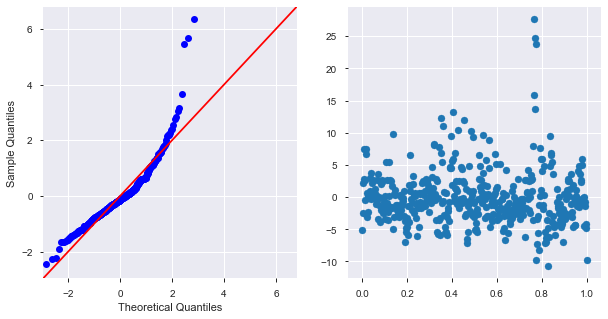

In [41]:
 
def diagnose_model(model):
    """
    Plot Q-Q plot and model residuals from statsmodels ols model.
    
    Args:
        model (smf.ols model): statsmodels formula ols 
    
    Returns:
        fig, ax: matplotlib objects
    """
    
    resids = model.resid
    
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    sms.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    xs = np.linspace(0,1,len(resids))
    ax[1].scatter(x=xs,y=resids)
    
    return fig,ax 

diagnose_model(model)

In [42]:
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smf


def make_ols_f(df,target='price',col_list=None,exclude_cols=[],
               cat_cols = [],  show_summary=True,
               diagnose=True,
               return_formula=False):
    """
    Makes statsmodels formula-based regression with options to make categorical columns.    
    Args:
        df (Frame): df with data
        target (str): target column name
        col_list (list, optional): List of predictor columns. Defaults to all except target.
        exclude_cols (list, optional): Columns to remove from col_list. Defaults to [].
        cat_cols (list, optional): Columns to process as categorical using f'C({col})". Defaults to [].
        show_summary (bool, optional): Display model.summary(). Defaults to True.
        diagnose (bool, optional): Plot Q-Q plot & residuals. Defaults to True.
        return_formula (bool, optional): Return formula with model. Defaults to False.
    
    Returns:
        model : statsmodels ols model
        formula : str formula from model, only if return_formula == True
        
    
    """
    if col_list is None:
        col_list = list(df.drop(target,axis=1).columns)
        
    ## remove exclude cols
    [col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]

    ## Make rightn side of formula eqn
    features = '+'.join(col_list)

    # ADD C() around categorical cols
    for col in cat_cols:
        features = features.replace(col,f"C({col})")

    ## MAKE FULL FORMULA
    formula = target+'~'+features #target~predictors
    #print(formula)
    
    ## Fit model
    model = smf.ols(formula=formula, data=df).fit()
    
    ## Display summary
    if show_summary:
        display(model.summary())
        
    ## Plot Q-Qplot & model residuals
    if diagnose:
        fig,ax = diagnose_model(model)
        plt.show()

    # Returns formula or just mmodel
    if return_formula:
        return model,formula
    else:
        return model

   

## Making a baseline model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     84.95
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          1.58e-114
Time:                        19:57:46   Log-Likelihood:                -1297.5
No. Observations:                 448   AIC:                             2625.
Df Residuals:                     433   BIC:                             2687.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7961      0.318     68.575      0.000      21.171      22.421
CRIM          -1.1842      0.682     -1.735      0.083      -2.525       0.157
ZN             0.1433      0.359      0.399      0.690      -0.562       0.849
INDUS          0.2060      0.407      0.506      0.613      -0.595       1.007
CHAS           3.1923      0.835      3.822      0.000       1.551       4.834
NOX           -1.7432      0.446     -3.909      0.000      -2.620      -0.867
RM             3.4483      0.340     10.134      0.000       2.779       4.117
AGE           -0.3261      0.366     -0.892      0.373      -1.045       0.393
DIS           -2.7164      0.437     -6.215      0.000      -3.575      -1.857
RAD            2.2780      0.624      3.650      0.000       1.052       3.505
TAX           -1.6495      0.621     -2.657      0.008      -2.870      -0.429
PTRATIO       -1.9225      0.280     -6.868      0.000      -2.473      -1.372
B              0.6700      0.408      1.643      0.101      -0.132       1.472
LSTAT         -3.6580      0.408     -8.961      0.000      -4.460      -2.856
example        0.1469      0.135      1.087      0.278      -0.119       0.413
==============================================================================
Omnibus:                      206.441   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1439.903
Skew:                           1.855   Prob(JB):                         0.00
Kurtosis:                      10.960   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

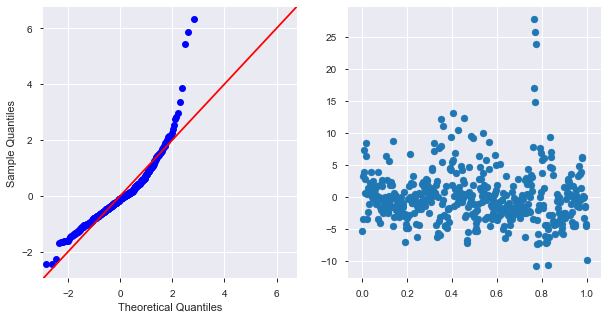

In [43]:
kws = dict( target='price')#,cat_cols=cat_cols )
model = make_ols_f(df,**kws)#,target='price',cat_cols=cat_cols)

In [44]:
## Get p-values
res = pd.DataFrame({'p-value': model.pvalues,
             'coeffs' :model.params,
             'sig': model.pvalues <.05})
res

,p-value,coeffs,sig
Intercept,1.148366e-234,21.796095,True
CRIM,8.341281e-02,-1.184179,False
ZN,6.901178e-01,0.143252,False
INDUS,6.133615e-01,0.205990,False
CHAS,1.517607e-04,3.192316,True
NOX,1.074602e-04,-1.743186,True
RM,8.450203e-22,3.448292,True
AGE,3.730052e-01,-0.326069,False
DIS,1.208721e-09,-2.716405,True
RAD,2.937571e-04,2.278030,True


In [45]:
## get list of cols to exclude
res.loc[res['sig']==True]

,p-value,coeffs,sig
Intercept,1.148366e-234,21.796095,True
CHAS,1.517607e-04,3.192316,True
NOX,1.074602e-04,-1.743186,True
RM,8.450203e-22,3.448292,True
DIS,1.208721e-09,-2.716405,True
RAD,2.937571e-04,2.278030,True
TAX,8.181352e-03,-1.649481,True
PTRATIO,2.272950e-11,-1.922491,True
LSTAT,9.632374e-18,-3.658043,True


In [46]:
res.query('sig == False')

,p-value,coeffs,sig
CRIM,0.083413,-1.184179,False
ZN,0.690118,0.143252,False
INDUS,0.613361,0.205990,False
AGE,0.373005,-0.326069,False
B,0.101163,0.670022,False
example,0.277685,0.146906,False


## Interactions Effect On Model

### Adding interaction terms

In [47]:
df['CHAS_TAX'] = df['CHAS'] * df['TAX']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example,CHAS_TAX
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,0,-0.0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,2,-0.0
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,1,-0.0
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,1,-0.0
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,0,-0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     84.48
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          4.54e-118
Time:                        19:57:47   Log-Likelihood:                -1286.6
No. Observations:                 448   AIC:                             2605.
Df Residuals:                     432   BIC:                             2671.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7817      0.311     70.132      0.000      21.171      22.392
CRIM          -1.0380      0.668     -1.555      0.121      -2.350       0.274
ZN             0.1178      0.351      0.336      0.737      -0.572       0.807
INDUS          0.2813      0.398      0.706      0.481      -0.502       1.064
CHAS           3.8511      0.828      4.649      0.000       2.223       5.479
NOX           -2.1268      0.443     -4.796      0.000      -2.998      -1.255
RM             3.5725      0.334     10.710      0.000       2.917       4.228
AGE           -0.3819      0.357     -1.068      0.286      -1.084       0.321
DIS           -2.8558      0.428     -6.670      0.000      -3.697      -2.014
RAD            2.2262      0.610      3.650      0.000       1.028       3.425
TAX           -1.9236      0.610     -3.156      0.002      -3.122      -0.726
PTRATIO       -2.0221      0.274     -7.370      0.000      -2.561      -1.483
B              0.6003      0.399      1.505      0.133      -0.184       1.384
LSTAT         -3.2666      0.408     -8.013      0.000      -4.068      -2.465
example        0.1609      0.132      1.218      0.224      -0.099       0.421
CHAS_TAX       4.0918      0.882      4.639      0.000       2.358       5.825
==============================================================================
Omnibus:                      194.567   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1415.160
Skew:                           1.707   Prob(JB):                    5.03e-308
Kurtosis:                      11.010   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c247869e8>,
       dtype=object))

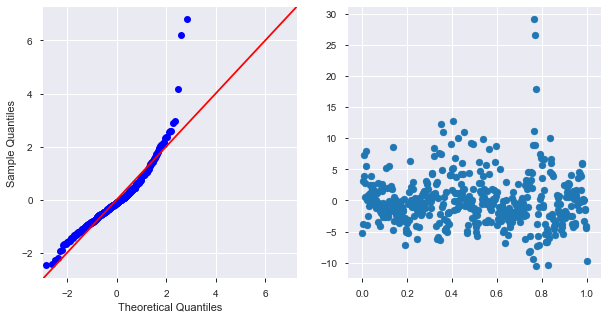

In [48]:
## Fit model
target='price'
features = df.drop(columns=[target]).columns

formula = target+ ' ~ '+ '+'.join(features)

model = smf.ols(formula=formula, data=df).fit()
display(model.summary())
diagnose_model(model)

# make_ols_f(df,cat_cols=cat_cols)

In [49]:
## To create multiple interaction columns
ixn_cols = [['CHAS',"TAX"],
            ['CHAS','PTRATIO']]

for cols in ixn_cols:
    df[cols[0]+'_'+ cols[1]] = df[cols[0]] * df[cols[1]]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example,CHAS_TAX,CHAS_PTRATIO
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,0,-0.0,-0.0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,2,-0.0,-0.0
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,1,-0.0,-0.0
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,1,-0.0,0.0
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,0,-0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     79.47
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          1.70e-117
Time:                        19:57:47   Log-Likelihood:                -1285.6
No. Observations:                 448   AIC:                             2605.
Df Residuals:                     431   BIC:                             2675.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.8009      0.311     70.190      0.000      21.190      22.411
CRIM            -0.9550      0.670     -1.426      0.155      -2.271       0.361
ZN               0.0859      0.351      0.245      0.807      -0.605       0.776
INDUS            0.3285      0.400      0.822      0.411      -0.457       1.114
CHAS             4.3010      0.891      4.827      0.000       2.550       6.052
NOX             -2.0215      0.450     -4.495      0.000      -2.905      -1.138
RM               3.5886      0.333     10.762      0.000       2.933       4.244
AGE             -0.3863      0.357     -1.082      0.280      -1.088       0.316
DIS             -2.7941      0.430     -6.496      0.000      -3.639      -1.949
RAD              2.1063      0.616      3.422      0.001       0.896       3.316
TAX             -1.8796      0.610     -3.082      0.002      -3.078      -0.681
PTRATIO         -2.0779      0.277     -7.498      0.000      -2.623      -1.533
B                0.5700      0.399      1.428      0.154      -0.214       1.354
LSTAT           -3.3261      0.410     -8.120      0.000      -4.131      -2.521
example          0.1555      0.132      1.178      0.239      -0.104       0.415
CHAS_TAX         3.4009      1.017      3.345      0.001       1.403       5.399
CHAS_PTRATIO     1.4127      1.037      1.363      0.174      -0.625       3.451
==============================================================================
Omnibus:                      195.464   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1444.564
Skew:                           1.711   Prob(JB):                         0.00
Kurtosis:                      11.104   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c24a6cf98>,
       dtype=object))

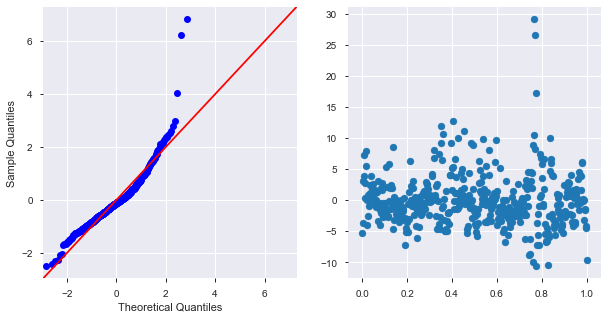

In [50]:
## Fit model
target='price'
features = df.drop(columns=[target]).columns

formula = target+ ' ~ '+ '+'.join(features)

model = smf.ols(formula=formula, data=df).fit()
display(model.summary())
diagnose_model(model)

In [51]:
def make_ols_f_ixn(df,target='price',col_list=None,exclude_cols=[],
               cat_cols = [], ixn_cols=[],  show_summary=True,
               diagnose=True,
               return_formula=False):
    """
    Makes statsmodels formula-based regression with options to make categorical columns.    
    Args:
        df (Frame): df with data
        target (str): target column name
        col_list (list, optional): List of predictor columns. Defaults to all except target.
        exclude_cols (list, optional): Columns to remove from col_list. Defaults to [].
        cat_cols (list, optional): Columns to process as categorical using f'C({col})". Defaults to [].
        ixn_cols ()
        show_summary (bool, optional): Display model.summary(). Defaults to True.
        diagnose (bool, optional): Plot Q-Q plot & residuals. Defaults to True.
        return_formula (bool, optional): Return formula with model. Defaults to False.
    
    Returns:
        model : statsmodels ols model
        formula : str formula from model, only if return_formula == True
        
    
    """
    if col_list is None:
        col_list = list(df.drop(target,axis=1).columns)
        
    ## remove exclude cols
    [col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]
    
    ## ADDDING INTERACTION TERMS    
    if len(ixn_cols)>0:
        for ixn in ixn_cols:
            ixn_term=f"{ixn[0]}*{ixn[1]}"
            col_list.append(ixn_term) #= features + ixn_term
        
        
    ## Make rightn side of formula eqn
    features = '+'.join(col_list)

    # ADD C() around categorical cols
    for col in cat_cols:
        features = features.replace(col,f"C({col})")


        
    ## MAKE FULL FORMULA
    formula = target+'~'+features #target~predictors
    #print(formula)
    
    ## Fit model
    model = smf.ols(formula=formula, data=df).fit()
    
    ## Display summary
    if show_summary:
        display(model.summary())
        
    ## Plot Q-Qplot & model residuals
    if diagnose:
        fig,ax = diagnose_model(model)
        plt.show()

    # Returns formula or just mmodel
    if return_formula:
        return model,formula
    else:
        return model
    
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     79.47
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          1.70e-117
Time:                        19:57:48   Log-Likelihood:                -1285.6
No. Observations:                 448   AIC:                             2605.
Df Residuals:                     431   BIC:                             2675.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.8009      0.311     70.190      0.000      21.190      22.411
CRIM            -0.9550      0.670     -1.426      0.155      -2.271       0.361
ZN               0.0859      0.351      0.245      0.807      -0.605       0.776
INDUS            0.3285      0.400      0.822      0.411      -0.457       1.114
CHAS             4.3010      0.891      4.827      0.000       2.550       6.052
NOX             -2.0215      0.450     -4.495      0.000      -2.905      -1.138
RM               3.5886      0.333     10.762      0.000       2.933       4.244
AGE             -0.3863      0.357     -1.082      0.280      -1.088       0.316
DIS             -2.7941      0.430     -6.496      0.000      -3.639      -1.949
RAD              2.1063      0.616      3.422      0.001       0.896       3.316
TAX             -1.8796      0.610     -3.082      0.002      -3.078      -0.681
PTRATIO         -2.0779      0.277     -7.498      0.000      -2.623      -1.533
B                0.5700      0.399      1.428      0.154      -0.214       1.354
LSTAT           -3.3261      0.410     -8.120      0.000      -4.131      -2.521
example          0.1555      0.132      1.178      0.239      -0.104       0.415
CHAS_TAX         1.7004      0.508      3.345      0.001       0.701       2.700
CHAS_PTRATIO     0.7064      0.518      1.363      0.174      -0.313       1.725
CHAS:TAX         1.7004      0.508      3.345      0.001       0.701       2.700
CHAS:PTRATIO     0.7064      0.518      1.363      0.174      -0.313       1.725
==============================================================================
Omnibus:                      195.464   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1444.564
Skew:                           1.711   Prob(JB):                         0.00
Kurtosis:                      11.104   Cond. No.                     2.89e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

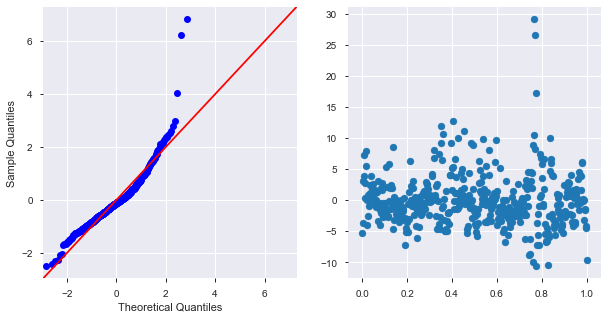

In [52]:
make_ols_f_ixn(df,ixn_cols=ixn_cols,**kws)

## Testing all possible interactions

In [53]:
import itertools

ixn_cols = list(df.drop(columns=[target]).columns)
ixn_cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'example',
 'CHAS_TAX',
 'CHAS_PTRATIO']

In [54]:
ixn_cols = list(itertools.combinations(ixn_cols,2))

In [55]:
kws

{'target': 'price'}

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     29.97
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          1.18e-124
Time:                        19:57:48   Log-Likelihood:                -1032.1
No. Observations:                 448   AIC:                             2310.
Df Residuals:                     325   BIC:                             2815.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                37.3277      7.422      5.029      0.000      22.727      51.929
CRIM                     36.7725     18.557      1.982      0.048       0.266      73.279
ZN                       39.3752     16.728      2.354      0.019       6.466      72.284
INDUS                     1.1442     11.982      0.095      0.924     -22.429      24.717
CHAS                     -6.8718     46.217     -0.149      0.882     -97.795      84.051
NOX                      -1.0334      0.842     -1.228      0.220      -2.689       0.622
RM                        4.8248      0.472     10.231      0.000       3.897       5.753
AGE                      -3.5019      0.687     -5.094      0.000      -4.854      -2.150
DIS                      -6.3892      1.157     -5.524      0.000      -8.665      -4.114
RAD                     -13.8942     20.253     -0.686      0.493     -53.738      25.950
TAX                      13.0011     28.723      0.453      0.651     -43.506      69.508
PTRATIO                   4.9033      2.925      1.676      0.095      -0.851      10.657
B                         1.0140      1.034      0.980      0.328      -1.021       3.049
LSTAT                    -2.0738      0.594     -3.492      0.001      -3.242      -0.906
example                   0.0310      0.113      0.274      0.784      -0.191       0.253
CHAS_TAX                 -5.1880     30.722     -0.169      0.866     -65.627      55.251
CHAS_PTRATIO             -7.1885     25.170     -0.286      0.775     -56.706      42.329
CRIM:ZN                  95.0176     41.274      2.302      0.022      13.819     176.216
CRIM:INDUS                4.3190     29.678      0.146      0.884     -54.067      62.705
CRIM:CHAS                 4.5469     61.306      0.074      0.941    -116.060     125.154
CRIM:NOX                 -1.4228      1.319     -1.079      0.282      -4.018       1.172
CRIM:RM                   1.0558      0.654      1.615      0.107      -0.230       2.342
CRIM:AGE                 -2.9032      1.874     -1.549      0.122      -6.590       0.784
CRIM:DIS                 -5.0318      3.420     -1.471      0.142     -11.760       1.696
CRIM:RAD                -42.6124     49.898     -0.854      0.394    -140.777      55.552
CRIM:TAX                 39.4206     70.549      0.559      0.577     -99.369     178.210
CRIM:PTRATIO             12.0919      7.536      1.604      0.110      -2.734      26.918
CRIM:B                   -1.5074      0.746     -2.022      0.044      -2.974      -0.041
CRIM:LSTAT                1.7642      0.873      2.021      0.044       0.047       3.482
CRIM:example              0.8514      0.368      2.315      0.021       0.128       1.575
CRIM:CHAS_TAX            68.0819    173.557      0.392      0.695    -273.354     409.518
CRIM:CHAS_PTRATIO      

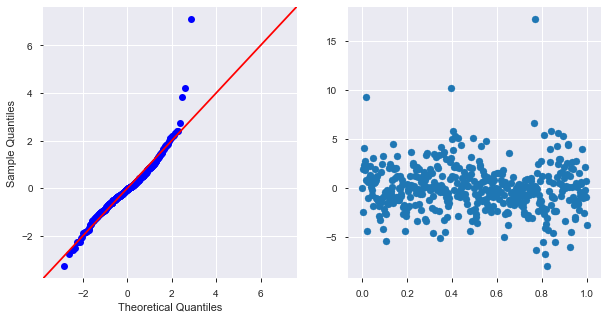

In [56]:
model = make_ols_f_ixn(df,**kws, ixn_cols=ixn_cols)

In [57]:
res = pd.DataFrame({'p-value': model.pvalues,
             'coeffs' :model.params,
             'sig': model.pvalues <.05})
res

,p-value,coeffs,sig
Intercept,8.153444e-07,37.327731,True
CRIM,4.836069e-02,36.772491,True
ZN,1.917635e-02,39.375209,True
INDUS,9.239864e-01,1.144180,False
CHAS,8.818954e-01,-6.871778,False
...,...,...,...
LSTAT:CHAS_TAX,7.345033e-01,-32.417684,False
LSTAT:CHAS_PTRATIO,9.148101e-01,-2.701748,False
example:CHAS_TAX,6.734934e-01,1.803268,False
example:CHAS_PTRATIO,8.677877e-01,-0.822538,False


In [58]:
good_ixn_cols = res.loc[res['sig']==True].index
good_ixn_cols

Index(['Intercept', 'CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'LSTAT', 'CRIM:ZN',
       'CRIM:B', 'CRIM:LSTAT', 'CRIM:example', 'ZN:TAX', 'NOX:AGE', 'RM:AGE',
       'RM:B', 'RM:LSTAT', 'AGE:RAD', 'AGE:LSTAT', 'DIS:LSTAT', 'TAX:PTRATIO',
       'LSTAT:example'],
      dtype='object')

In [60]:
good_ixn_cols = [col for col in good_ixn_cols if ':' in col]

good_ixn_cols

['CRIM:ZN',
 'CRIM:B',
 'CRIM:LSTAT',
 'CRIM:example',
 'ZN:TAX',
 'NOX:AGE',
 'RM:AGE',
 'RM:B',
 'RM:LSTAT',
 'AGE:RAD',
 'AGE:LSTAT',
 'DIS:LSTAT',
 'TAX:PTRATIO',
 'LSTAT:example']

In [61]:
use_ixn_cols = []
for cols in good_ixn_cols:
    use_ixn_cols.append(cols.split(':'))
use_ixn_cols

[['CRIM', 'ZN'],
 ['CRIM', 'B'],
 ['CRIM', 'LSTAT'],
 ['CRIM', 'example'],
 ['ZN', 'TAX'],
 ['NOX', 'AGE'],
 ['RM', 'AGE'],
 ['RM', 'B'],
 ['RM', 'LSTAT'],
 ['AGE', 'RAD'],
 ['AGE', 'LSTAT'],
 ['DIS', 'LSTAT'],
 ['TAX', 'PTRATIO'],
 ['LSTAT', 'example']]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     70.72
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          1.25e-143
Time:                        19:58:07   Log-Likelihood:                -1188.8
No. Observations:                 448   AIC:                             2440.
Df Residuals:                     417   BIC:                             2567.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        28.8402      4.291      6.721      0.000      20.405      37.275
CRIM             17.4534     10.356      1.685      0.093      -2.903      37.810
ZN               14.9580      8.768      1.706      0.089      -2.277      32.193
INDUS             0.5928      0.361      1.642      0.101      -0.117       1.302
CHAS              2.9594      0.743      3.982      0.000       1.499       4.420
NOX              -1.3947      0.510     -2.733      0.007      -2.398      -0.391
RM                2.8743      0.331      8.687      0.000       2.224       3.525
AGE              -1.1956      0.397     -3.015      0.003      -1.975      -0.416
DIS              -2.1450      0.388     -5.532      0.000      -2.907      -1.383
RAD               1.5556      0.607      2.561      0.011       0.362       2.750
TAX              -2.0602      0.532     -3.871      0.000      -3.107      -1.014
PTRATIO          -0.9859      0.324     -3.047      0.002      -1.622      -0.350
B                 0.3102      0.418      0.743      0.458      -0.511       1.131
LSTAT            -3.6004      0.514     -7.008      0.000      -4.610      -2.591
example           0.0819      0.116      0.705      0.481      -0.147       0.310
CHAS_TAX          2.4550      0.855      2.873      0.004       0.775       4.135
CHAS_PTRATIO      1.1137      0.871      1.279      0.202      -0.598       2.826
CRIM:ZN          34.5754     21.131      1.636      0.103      -6.962      76.113
CRIM:B           -0.5761      0.433     -1.330      0.184      -1.427       0.275
CRIM:LSTAT       -2.0620      0.507     -4.066      0.000      -3.059      -1.065
CRIM:example      0.4243      0.259      1.635      0.103      -0.086       0.934
ZN:TAX            0.8450      0.647      1.306      0.192      -0.427       2.117
NOX:AGE           0.0858      0.460      0.187      0.852      -0.818       0.989
RM:AGE           -1.4827      0.312     -4.749      0.000      -2.096      -0.869
RM:B             -0.5821      0.485     -1.200      0.231      -1.536       0.371
RM:LSTAT         -2.6105      0.241    -10.820      0.000      -3.085      -2.136
AGE:RAD           0.7277      0.426      1.708      0.088      -0.110       1.565
AGE:LSTAT        -1.7248      0.379     -4.556      0.000      -2.469      -0.981
DIS:LSTAT         0.8331      0.359      2.320      0.021       0.127       1.539
TAX:PTRATIO       0.8311      0.513      1.621      0.106      -0.176       1.839
LSTAT:example    -0.3939      0.145     -2.710      0.007      -0.680      -0.108
==============================================================================
Omnibus:                      201.683   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2017.386
Skew:                           1.667   Prob(JB):         

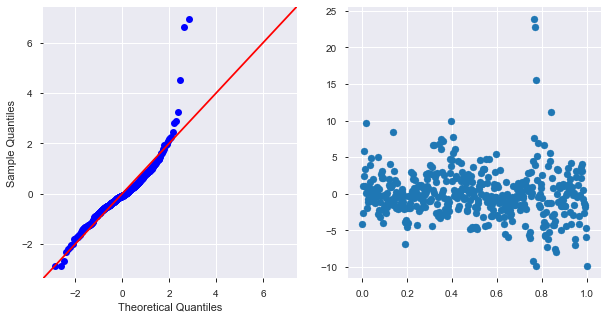

In [62]:
make_ols_f_ixn(df,target='price',ixn_cols=use_ixn_cols)

# Polynomial Regressions

Remember we started with (multiple) linear equation:

$$ \large \hat{y} = w_0 + w_1  x_1 + w_2  x_2 + ... + w_N  x_N $$
$$ \large \hat{y} = \sum_{n=0}^{N} w_n x_n $$


**Knowledge check:** Why is this "linear"?

## Making it more complex!

In [63]:
df = fs.datasets.load_yields(version='other')
display(df.head())

,Temp,Yield
i,,
1,50,3.3
2,50,2.8
3,50,2.9
4,50,3.2
5,60,2.7


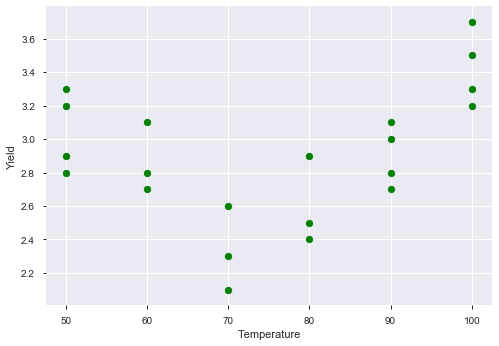

In [64]:
y = df['Yield']
X = df.drop(columns=['Yield'])


plt.scatter(X, y, color='green')
plt.xlabel('Temperature')
plt.ylabel('Yield');

$\large \hat y = \hat \beta_0 + \hat \beta_1x $ 

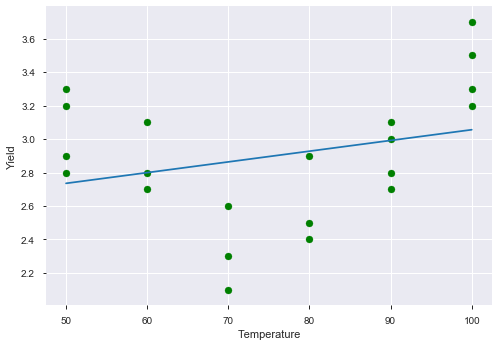

In [65]:
## Fit a simple linear model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

plt.scatter(X, y, color='green')
plt.plot(X, reg.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y, reg.predict(X))
mse = mean_squared_error(y,reg.predict(X))
print(f"R2 = {r2}")
print(f"MSE = {mse}")

R2 = 0.08605718085106362
MSE = 0.13926747720364746


### A quadratic relationship
$\large \hat y = \hat \beta_0 + \hat \beta_1x + \hat \beta_2 x^2$ 

In [67]:
X['Temp_sq'] = X['Temp']**2
X

,Temp,Temp_sq
i,,
1,50,2500
2,50,2500
3,50,2500
4,50,2500
5,60,3600
6,60,3600
7,60,3600
8,70,4900
9,70,4900


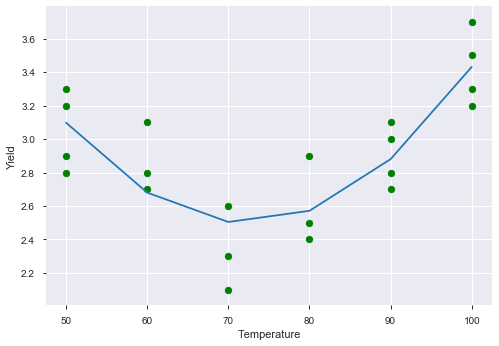

In [68]:
x_plot = X["Temp"]
reg_q = LinearRegression().fit(X,y)


plt.scatter(x_plot, y, color='green')
plt.plot(x_plot, reg_q.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [69]:
r2 = r2_score(y, reg_q.predict(X))
mse = mean_squared_error(y,reg_q.predict(X))
print(f"R2 = {r2}")
print(f"MSE = {mse}")

R2 = 0.6948165884110552
MSE = 0.04650413890879159


Adding higher-order polynomials
$$ \large \hat{y} = \beta_0 + \beta_1  x + \beta_2  x^2 + ... + \beta_N  x^N $$
$$ \large \hat{y} = \sum_{n=0}^{N} \beta_n x^n $$

In [70]:
y = df['Yield']
X = df.drop(columns=['Yield'])
X.shape

(21, 1)

In [71]:
from sklearn.preprocessing import PolynomialFeatures
n_poly = 6
polyfeat = PolynomialFeatures(n_poly)
X_poly = polyfeat.fit_transform(X)
display(X_poly[:10])
X_poly.shape

array([[1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05, 6.25000e+06,
        3.12500e+08, 1.56250e+10],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05, 6.25000e+06,
        3.12500e+08, 1.56250e+10],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05, 6.25000e+06,
        3.12500e+08, 1.56250e+10],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05, 6.25000e+06,
        3.12500e+08, 1.56250e+10],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05, 1.29600e+07,
        7.77600e+08, 4.66560e+10],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05, 1.29600e+07,
        7.77600e+08, 4.66560e+10],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05, 1.29600e+07,
        7.77600e+08, 4.66560e+10],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05, 2.40100e+07,
        1.68070e+09, 1.17649e+11],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05, 2.40100e+07,
        1.68070e+09, 1.17649e+11],
       [1.00000e+00, 7.00000

(21, 7)

In [72]:
col_names = [f"{'Temp'}^{i}" for i in range(n_poly+1)]
df_poly = pd.DataFrame(X_poly,columns=col_names)
df_poly

,Temp^0,Temp^1,Temp^2,Temp^3,Temp^4,Temp^5,Temp^6
0,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
1,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
2,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
3,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
4,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10
5,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10
6,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10
7,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11
8,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11
9,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11


In [73]:
reg_poly = LinearRegression().fit(X_poly,y)

r2 = r2_score(y, reg_poly.predict(X_poly))
mse = mean_squared_error(y,reg_poly.predict(X_poly))
print(f"R2 = {r2}")
print(f"MSE = {mse}")

R2 = 0.7591145833332826
MSE = 0.03670634920635693


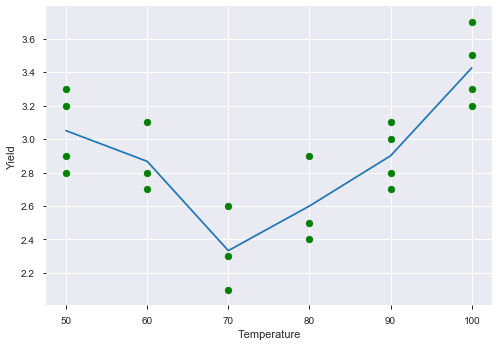

In [74]:
plt.scatter(x_plot, y, color='green')
plt.plot(x_plot, reg_poly.predict(X_poly))
plt.xlabel('Temperature')
plt.ylabel('Yield');

### A note regarding shape-related errors

In [75]:
## sci-kit learn expect 2-D data for our X data.
LinearRegression().fit(df['Temp'],y=df['Yield'])


ValueError: Expected 2D array, got 1D array instead:
array=[ 50  50  50  50  60  60  60  70  70  70  80  80  80  90  90  90  90 100
 100 100 100].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [79]:
## We can fix this error by following the error msgs' recommendation
LinearRegression().fit(df['Temp'].values.reshape(-1,1),y=df['Yield'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
## Or we can fix this error by using a list of lists with our column name
LinearRegression().fit(df[['Temp']],y=df['Yield'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
df['Temp'].shape

(21,)

In [82]:
df[['Temp']].shape

(21, 1)

# Bias-Variance Trade Off

## Underfitting and Overfitting

> *Underfitting* happens when a model cannot learn the training data, nor can it generalize to new data.

> *Overfitting* happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data 

## The Bias-Variance Trade Off


Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. 

We can break down our error term (the mean squared error) as the sum of 3 sources of error: 

- *bias*
- *variance*, and
- *irreducible error* 

 

$$ \large \text{MSE} = \text{Bias}(\hat{f}(x))^2 + \text{Var}(\hat{f}(x)) + \sigma^2$$
- The derivation of this can be found [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-bias-variance-trade-off-online-ds-pt-100719/master/images/new_bias_variance.png" width=50%>


- **Bias** arises when wrong assumptions are made when training a model. For example:

    - An interaction effect is missed, 
    - We missed a certain polynomial relationship. 
    
    - Because of this, our algorithm misses the relevant relations between predictors and the target variable.
    - *(Note how this is similar to underfitting!)*


- **Variance** arises  when a model is too sensitive to small fluctuations in the training set. 

    - When variance is high, random noise is modeled instead of the intended outputs. 
    - *(This is overfitting!)*

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/bias_variance_optimize.png">


> **The balance between bias and variance is a trade-off.** We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. 
- Bias is usually associated with low model complexity, variance with high model complexity.
- There is generally a "sweet spot" in-between, compromising between bias and variance.


